#  <center> Problem Set 6 <center>
<center> Spring 2022 <center>
<center> 3.C01, 10.C01, 20.C01 <center>
<center> Due: 5 PM ET on Monday, May 9, 2022 <center>

Register for the competition and download the data: 

https://www.kaggle.com/t/58b8ee1858b6446e81b7d3ebfbaa6922

In [1]:
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/ImmuneSignatures160.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/covariates_train.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/covariates_test.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/survival_train.csv

--2022-05-08 19:20:06--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/ImmuneSignatures160.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19203382 (18M) [text/plain]
Saving to: ‘ImmuneSignatures160.csv’

ImmuneSignatures160 100%[===================>]  18.31M  --.-KB/s    in 0.1s    

2022-05-08 19:20:08 (124 MB/s) - ‘ImmuneSignatures160.csv’ saved [19203382/19203382]

--2022-05-08 19:20:08--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/covariates_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [2]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

## Part 1: Characterizing Intra-Tumoral Immune States

### Part 1.1: (5 points) Visualization of Immune Modules

In [ ]:
# import file - immune signatures
genesig = pd.read_csv("ImmuneSignatures160.csv", index_col="Unnamed: 0")

# diverging colormap for visualizing standardized scores
cmap = sns.diverging_palette(220, 20, as_cmap=True)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


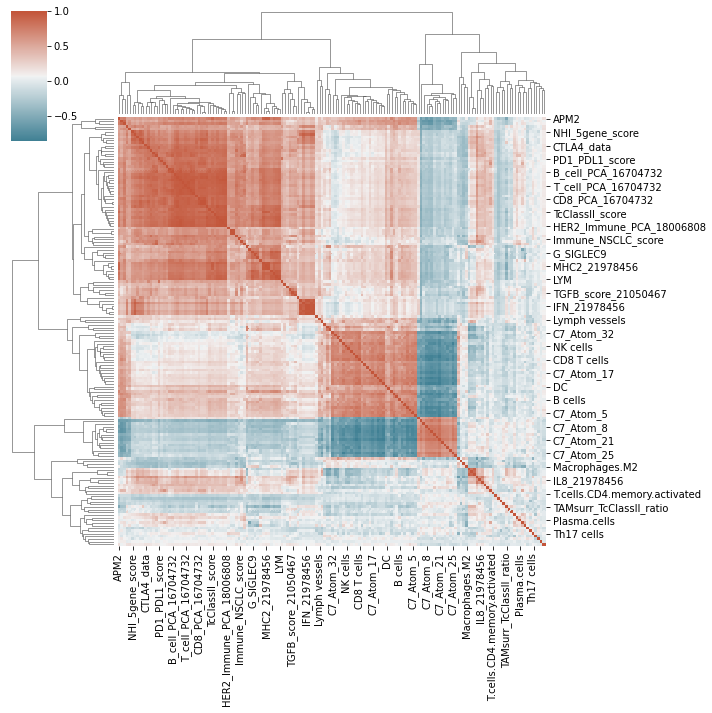

In [ ]:
# Immune Signature Cluster Modeling
corr = genesig.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.clustermap(corr, cmap=cmap)

How many clusters can you observe? There is no single right answer; just provide a visual guess.

In [ ]:
# I notice roughly 8 clusters.





### Part 1.2: (10 points) Clustering Analysis to Identify Modules

Compute the Silhouette Score for k ranging from 2 to 10, and pick the best value of k.

The best k-value is 4


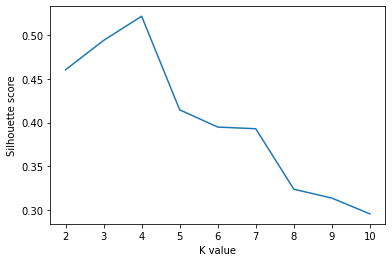

In [ ]:
scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i).fit(corr)
  labels = kmeans.labels_
  sscore = silhouette_score(corr,labels)
  scores.append([sscore])


plt.plot(range(2,11), scores)
plt.xlabel('K value')
plt.ylabel("Silhouette score")

max_value = max(scores)
index = scores.index(max_value)
best_k = index +2
print("The best k-value is %d" % (best_k))

## Part 2: Baseline Prediction of Cancer Progression

### Part 2.1: (10 points) Train a Logistic Regressor

Report a 5-fold cross-validation AUC.

In [ ]:

from sklearn.pipeline import make_pipeline
pipeline1 = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(solver='saga'))

imu_feats = pd.read_csv('covariates_train.csv',index_col="Unnamed: 0")
imu_labels = pd.read_csv('survival_train.csv')
labels = imu_labels[['label']]

crossVal = cross_val_score(pipeline1, imu_feats, np.ravel(labels), scoring='roc_auc', cv = 5)


mean = np.mean(crossVal)
std = np.std(crossVal)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


The mean of CV scores is 0.71
The std of CV scores is 0.02


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Part 2.2: (10 points) Train a Random Forest Classifier

Report a 5-fold cross-validation AUC.

In [ ]:

pipeline2 = make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators = 1000, min_samples_split = 15, max_depth = 9))

crossVal = cross_val_score(pipeline2, imu_feats, np.ravel(labels), scoring='roc_auc', cv = 5)

mean = np.mean(crossVal)
std = np.std(crossVal)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )

The mean of CV scores is 0.72
The std of CV scores is 0.02


In [ ]:
# HyperParameter Search

# I ran this code a few times, changing the parameter space to narrow in on the best ones
#only optimized AUROC by rougly 0.3

# pipeline = Pipeline(steps=[('scaler', preprocessing.StandardScaler()), ('model', RandomForestClassifier())])
# parameters = {'model__n_estimators': [1000,1280,1400], 
#               'model__min_samples_split': [15,16,17], 
#               'model__max_depth': [7,8,9]}

# search = GridSearchCV(pipeline, param_grid=parameters, scoring='roc_auc', cv = 5, verbose = 0, n_jobs = -1)
# search.fit(imu_feats, np.ravel(labels))
# results = search.cv_results_
# best_parameters = search.best_estimator_.get_params()
# print(best_parameters)

{'memory': None, 'steps': [('scaler', StandardScaler()), ('model', RandomForestClassifier(max_depth=9, min_samples_split=15, n_estimators=1000))], 'verbose': False, 'scaler': StandardScaler(), 'model': RandomForestClassifier(max_depth=9, min_samples_split=15, n_estimators=1000), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'model__bootstrap': True, 'model__ccp_alpha': 0.0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 9, 'model__max_features': 'auto', 'model__max_leaf_nodes': None, 'model__max_samples': None, 'model__min_impurity_decrease': 0.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 15, 'model__min_weight_fraction_leaf': 0.0, 'model__n_estimators': 1000, 'model__n_jobs': None, 'model__oob_score': False, 'model__random_state': None, 'model__verbose': 0, 'model__warm_start': False}


## Part 3: (70 points) Machine Learning Competition and Report

You can start a new notebook here to put all your models.

In [17]:
# train features
X_train_base = pd.read_csv("covariates_train.csv", index_col='Unnamed: 0')
# train labels
y_train_base = pd.read_csv("survival_train.csv", index_col='bcr_patient_barcode')
# test features 
X_test_base = pd.read_csv("covariates_test.csv", index_col='Unnamed: 0')

In [18]:
def save_submission(barcode, predict_proba, filename):
    '''
    Utility function to dump submission csv files.
    
    barcode (list): list of patient barcode
    predict_proba (numpy.array): 1-D numpy array that contrains probabilities for 0 and 1
    filename (str): where you want to save your submission
    '''
    assert len(barcode) == len(predict_proba)
    assert len(np.shape(predict_proba)) == 2
    
    submission = pd.DataFrame( {'bcr_patient_barcode': barcode, 'Predicted': predict_proba[:, 1]})
    submission.to_csv(filename, index=None)

You should submit probabilities for each sample instead of just 0s and 1s.

In [ ]:
# example usage: 

save_submission(X_test.index.tolist(), np.ones((len(X_test), 2)), './junk1.csv')


In [19]:
#dataloader for pytorch NN
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.preprocessing import MinMaxScaler

class ImmuneDataset(Dataset):
    def __init__(self, X, y):
        
        '''
        Dataset object that loads and scales examples. 
        
        '''
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        # scaler = StandardScaler()
        # scaler.fit(X)
        # X_scaled = scaler.transform(X)
        X_scaled = torch.Tensor(X_scaled)
        self.X = X_scaled
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

train_data = ImmuneDataset(X_train_base,y_train_base)
batch_size = 256
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)



In [24]:
#Scaling before testing preprocessing methods
#I tried both standard scaling and min max scaling, and standard scaling was slightly more effective
#It didn't really matter, since random forrest and extra tree classifiers were most
#effective, and they are scale-invariant.
#Standard scaling keeps useful information about outliers, while min max scaling
#is better suited for PCA, so I sought to compare the two.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_base)
X_test_scaled = scaler.transform(X_test_base)
train_labels = y_train_base[['label']]

#The data is inbalanced, so I will try and balance it. Smote worked better then ADASYN.
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#smote = ADASYN(random_state=11)
smote = SMOTE(random_state=11)
X_train_smote,label_smote = smote.fit_resample(X_train_scaled,train_labels)
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, label_smote, test_size=0.2)

In [ ]:
#PCA was not helpful ultimately.
pca = PCA(n_components='mle')
X_train_smote_PCA = pca.fit_transform(X_train_smote)
X_test_PCA = pca.transform(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Text(0, 0.5, 'Mean decrease in impurity')

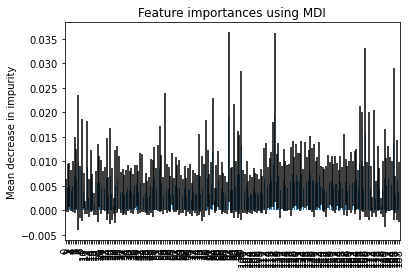

In [21]:
#Random forest analysis of feature importance
#STD is very high, so cardinality may be high. I will now try to evaluate importance
#based on feature permuation.
rf = RandomForestClassifier()
rf.fit(X_train_smote,label_smote)
importances = rf.feature_importances_
feature_names = range(0,np.shape(X_train_smote)[1])
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

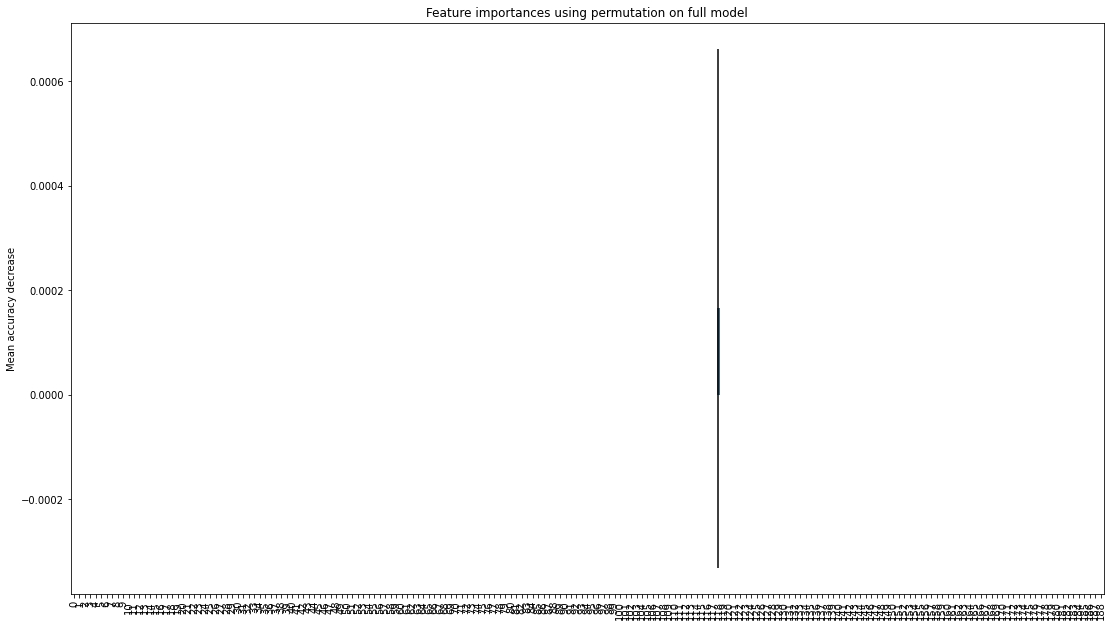

In [22]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean,feature_names)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.show()
# This is interesting. The feature importances were all very close to zero, likely due to the model
#basically still having access to a permuted feature if another is closely correlated.
#To mitigate this, I will performing hierarchical clustering on the features’ 
#Spearman rank-order correlations

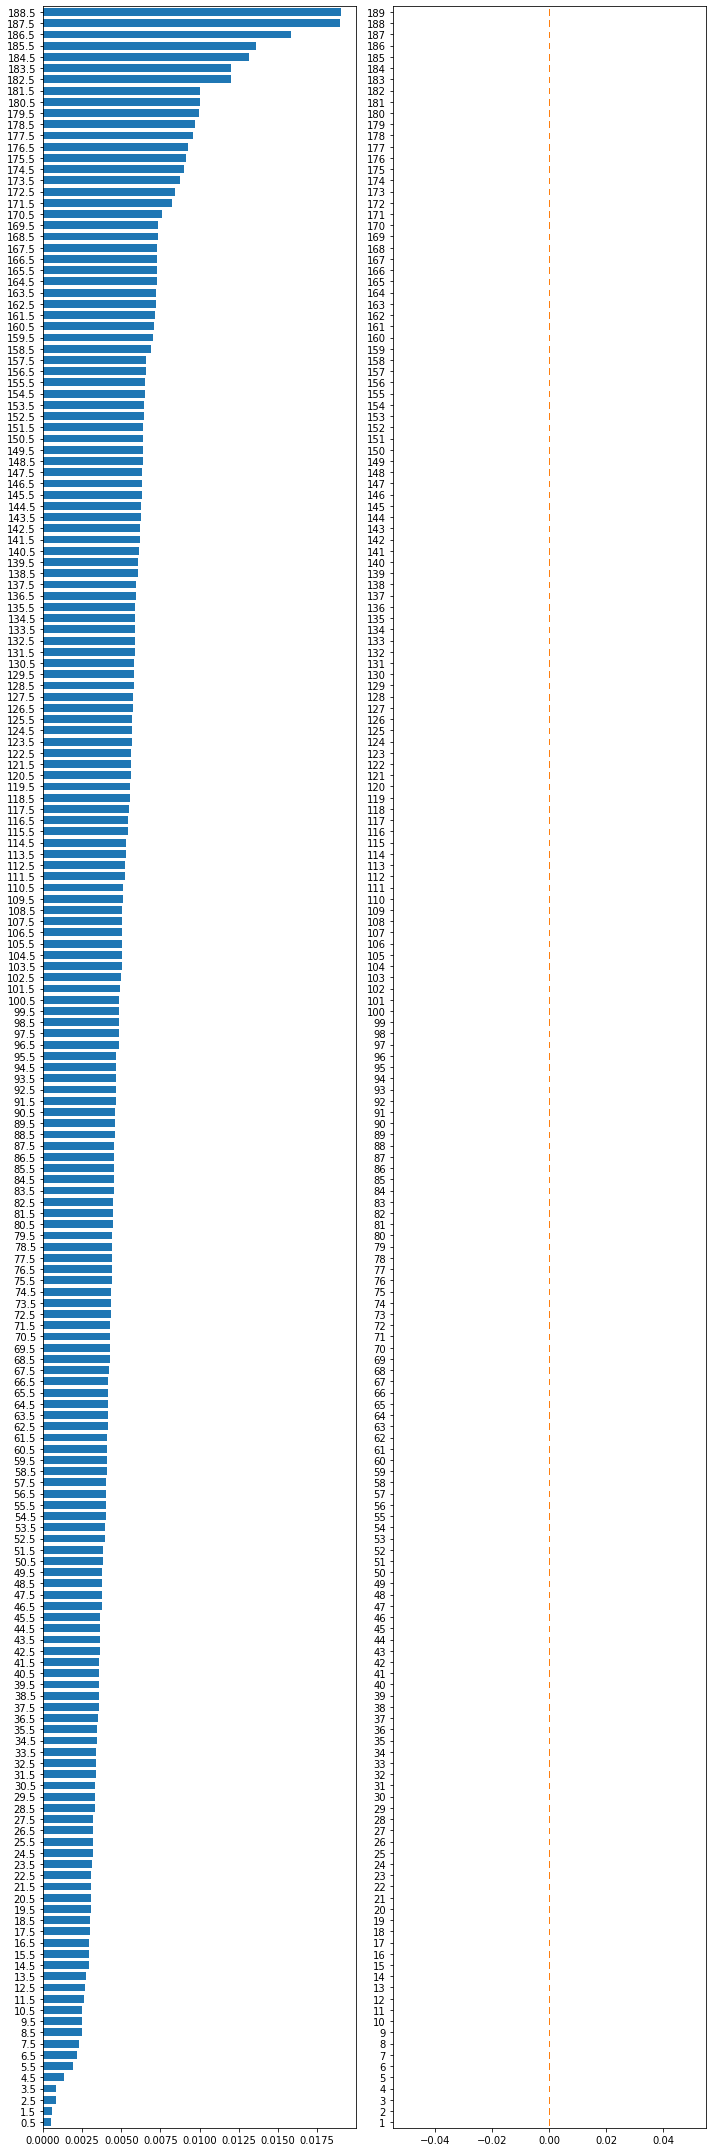

In [25]:
#ADOPTED FROM SKLEARN

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(rf.feature_importances_)
tree_indices = np.arange(0, len(rf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.set_size_inches(10, 30)
ax1.barh(tree_indices, rf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(rf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
)
fig.tight_layout()
plt.show()


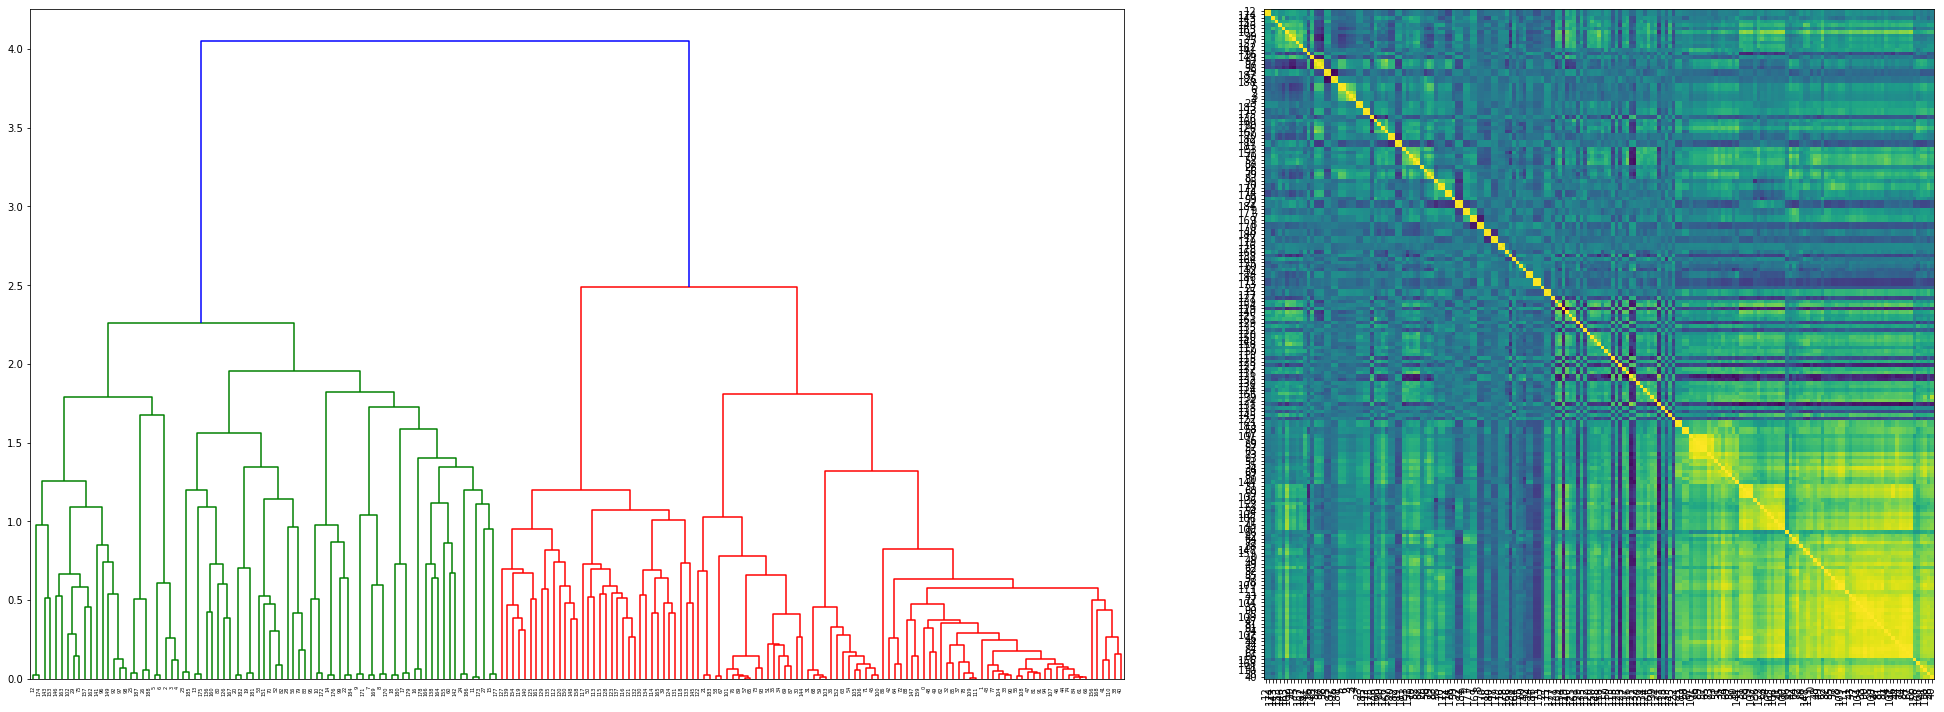

In [26]:
#Correlation mapping ADOPTED FROM SKLEARN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.set_size_inches(30, 10)
corr = spearmanr(X_train_smote).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=feature_names, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()



In [27]:
#Reduce dimensionality by chosing threshold for cluster similarity. Will pick one feature
#within each cluster and compare against recursive feature elimination.
#ADOPTED FROM SKLEARN
from collections import defaultdict
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]
X_sel = X_train_smote[:, selected_features]
X_final_test_sel = X_test_scaled[:, selected_features]
print(np.shape(X_train_sel))

(2414, 29)


In [15]:
#SGD Classifier, was not a good approach.
from sklearn.linear_model import SGDClassifier

crossVal = cross_val_score(SGDClassifier(), X_train_smote, np.ravel(label_smote), scoring='roc_auc', cv = 5)


mean = np.mean(crossVal)
std = np.std(crossVal)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )

The mean of CV scores is 0.74
The std of CV scores is 0.03


In [16]:
#same but with reduced features. Worse perforance.
from sklearn.linear_model import SGDClassifier

crossVal = cross_val_score(SGDClassifier(), X_train_sel, np.ravel(y_train), scoring='roc_auc', cv = 5)


mean = np.mean(crossVal)
std = np.std(crossVal)

print("The mean of CV scores is {:.2f}".format(mean) )
print("The std of CV scores is {:.2f}".format(std) )

The mean of CV scores is 0.63
The std of CV scores is 0.04


SVC with linear kernel and *RFE*

Optimal number of features : 160


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


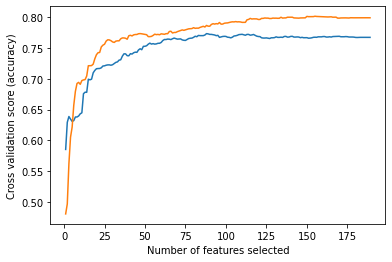

In [ ]:
#Recursive feature elimination for SVC ONLY FOR LINEAR KERNEL
#linear kernel seems like a bad option due to poor performance during max_iter testing
from sklearn.feature_selection import RFECV
from sklearn import svm
svc = svm.SVC(kernel="linear",probability=True)
min_features_to_select = 1
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_smote, np.ravel(label_smote))

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [29]:
from sklearn.feature_selection import RFE
from sklearn import svm
#Hyperparameter tuning for linear SVC
svc = svm.SVC(kernel='linear')
selector = RFE(svc, n_features_to_select=160, step=1)
selector = selector.fit(X_train_smote, np.ravel(label_smote))
X_train_RFE_shrunk = selector.transform(X_train_smote)
X_test_RFE_shrunk = selector.transform(X_test_scaled)
X_train_RFE_shrunk_split = selector.transform(X_train)
X_test_RFE_shrunk_split = selector.transform(X_test)
#
#I didnt log hyperparm values as I do later, but I tested a wide range
parameters = {'C': [0.075,0.08,0.09],
              'kernel' : ['linear'],
              'probability' : [True],
              'max_iter': [2000]}

search = GridSearchCV(estimator = svm.SVC(), param_grid=parameters, scoring='roc_auc', cv = 3, verbose = 0, n_jobs = -1)
search.fit(X_train_RFE_shrunk, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)

{'C': 0.075, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 2000, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=501).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/skl

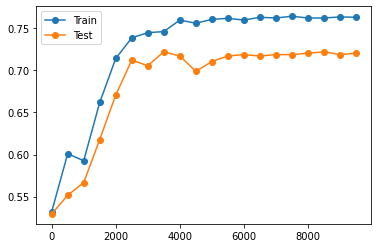

In [33]:
#The grid search was quite lengthy, so I am going to find a good number of max_iter
#to decrease run time. I am okay if fits using bad parameters that would take a long time to fit
#fail.

#Train auc should plateau, since the classifier should be able to classify the examples it was trained to classify as best as it can
#after a certain number of iterations.
#I am looking for the max_iter when the train auc plateaus to avoid overfitting that may come thereafter

#Test set here is different than real test set.
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
values = [i for i in range(1, 10000,500)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = svm.SVC(C=0.075,kernel = 'linear', max_iter=i,probability=True)
	# fit model on the training dataset
	model.fit(X_train_RFE_shrunk_split, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_RFE_shrunk_split)
	train_acc = roc_auc_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_RFE_shrunk_split)
	test_acc = roc_auc_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

#There is some overfitting, but accuracy is optimized at 1000 iterations. 

SVC with tree-based feature selection

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=405).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/s

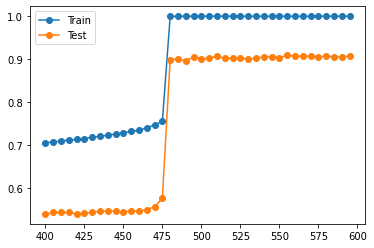

In [31]:
#Max_iter testing for SVC with tree-selected features and optimized hyperparameters with gridsearchcv, trained on smote data
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
values = [i for i in range(400, 600,5)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = svm.SVC(kernel = 'rbf',C=1.5, max_iter=i,gamma=2,degree=1,probability=True)
	# fit model on the training dataset
	model.fit(X_train_sel, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_sel)
	train_acc = roc_auc_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_sel)
	test_acc = roc_auc_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

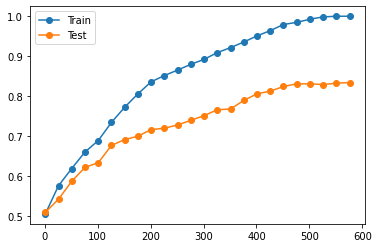

In [36]:
#testing out calibration
from sklearn.calibration import CalibratedClassifierCV
values = [i for i in range(1, 600,25)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = CalibratedClassifierCV(base_estimator=svm.SVC(kernel = 'rbf',C=1.5, max_iter=i,gamma=2,degree=1,probability=True),cv=3)
	# fit model on the training dataset
	model.fit(X_train_sel, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_sel)
	train_acc = roc_auc_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_sel)
	test_acc = roc_auc_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()



In [ ]:
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.feature_selection import RFE

#'C': [1,10,100,1000] ->10, [5,10,50]->5, [3,5,7] ->3, [2,2.5,3,3.5,4]->2,[1.5,1.75,2,2.25]->1.5
#'gamma': [0.1, 0.001] ->0.1, [0.01,0.1,1] -> 1,[1,10,20,100]->1, [0.3,0.5,0.7,1,5]->1,[1,2,3]->2
# 'degree' : [1,2,3,4,5]-> 1
#'kernel': [all]->1

parameters = {'C': [1.5,1.75,2,2.25],
              'kernel' : ['rbf'],
              'gamma': [1,2,3],
              'degree' : [1],
              'max_iter' : [1500],
              'probability' : [True]}

search = GridSearchCV(estimator = svm.SVC(), param_grid=parameters, scoring='roc_auc', cv = 3, verbose = 0, n_jobs = -1)
search.fit(X_sel, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)

{'C': 1.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 2, 'kernel': 'rbf', 'max_iter': 1500, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC with a nonlinear kernel (with incorrectly reduced features by RFE)

In [ ]:
#This below hyperparameter search is flawed, but I will still evaluate the results.
#Fit to linear SVM with 126 features
#still show that rbf is likely the best kernel for a large feature set

#######
#The below tuning results are not applicable. They considered feature reduction
#with a linear kernel, so the features were in a different space and RFE with a linear kernel
#means nothing to SVC with an rbf kernel, so I will retry hyperparam search without feature elimination compared to PCA.

#log of tuning results: 
#C: [10,1000] -> 10, [10,50,100,1000] -> 10, [1,5,9]->5, [3,4,5,6,7] -> 3,[1,2,2.25,2.5,2.75,3,3.25,3.5] -> 2
# [1.25,1.5,1.75,2] -> 1.5
# kernel: [all] -> rbf, -> rbf, ->rbf
# degree: [1:4] -> 1, -> 1, ->1
# gamma: [0.1,0.001,'scale'] -> 0.1, [1,0.1, 0.001,'scale'] -> 0.1, [0.5,0.1, 0.05,'scale'] -> 0.5
#[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,10] -> 0.4,[0.39,0.4,0.41] ->0.41

######
from sklearn.feature_selection import RFE

selector = RFE(svc, n_features_to_select=rfecv.n_features_, step=1)
selector = selector.fit(X_train_smote, np.ravel(label_smote))
X_train_RFE_shrunk = selector.transform(X_train_smote)
X_test_RFE_shrunk = selector.transform(X_test_scaled)

parameters = {'C': [1.3,1.4,1.5,1.6,1.7],
              'kernel' : ['rbf'],
              'gamma': [0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49],#[1, 0.1, 0.01, 0.001, 0.0001]
              'degree' : [1],
              'probability' : [True],
              'max_iter': [1000]}

search = GridSearchCV(estimator = svm.SVC(), param_grid=parameters, scoring='roc_auc', cv = 3, verbose = 0, n_jobs = -1)
search.fit(X_train_RFE_shrunk, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)



{'C': 1.4, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 0.41, 'kernel': 'rbf', 'max_iter': 1000, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
#overfitting analysis
#Test set here is different than real test set.
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
X_train, X_test, y_train, y_test = train_test_split(X_train_RFE_shrunk, label_smote, test_size=0.2)
values = [i for i in range(1, 2000,25)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = svm.SVC(max_iter=i, C=0.4,degree=4,kernel='poly',probability=True)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = roc_auc_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = roc_auc_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


Random Forrest Classifier

Optimal number of features : 179


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


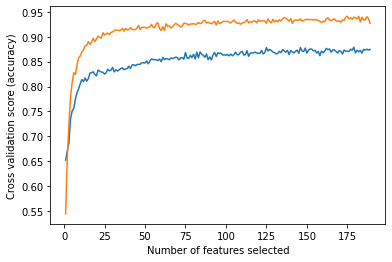

In [ ]:
#Recursive feature elimination for RFC
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier()
min_features_to_select = 1
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=StratifiedKFold(2),
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_smote, np.ravel(label_smote))

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [45]:
#RF hyperparameter tuning (RFE-features)
from sklearn.feature_selection import RFE
rf = RandomForestClassifier()
# selector = RFE(rf, n_features_to_select=186, step=1)
# selector = selector.fit(X_train_smote, np.ravel(label_smote))
# X_train_RFE_smote = selector.transform(X_train_smote)
# X_test_RFE_smote = selector.transform(X_test_scaled)

# 'n_estimators': [400],[200, 400]-> 400, [400,500] ->400, [300,400]-> 400
# 'max_depth' : [50,100] ->50, [25,50,75] -> 25, [15,25,35] ->35,[30,35,40] -> 40
# 'min_samples_split' : [1,20] -> 20, [1,20] -> 20,[15,20] ->15, [5,15]-> 5
# 'min_samples_leaf' : [1, 2, 5, 10] -> 1
# 'max_features' : [20,100]} ->20, [10,20,40] -> 10, [10,15] ->10, [5,10]-> 5

parameters = {'n_estimators': [400],
              'max_depth' : [45],
              'min_samples_split' : [1,2,3,4],
              'max_features' : [1,2,3]} 

search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parameters, scoring='roc_auc', cv = 3, verbose = 0, n_jobs = -1)
search.fit(X_train_RFE_smote, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parall

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 45, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [62]:
#hyperparameter tuning for tree-reduced features.
#Not as effective as RFE.
from sklearn.feature_selection import RFE
rf = RandomForestClassifier()
# 'n_estimators': [100,300] ->300, [200,300] ->200, [200,250,300]->300, [275,300,325] ->325, [325,350,400,500] ->350
# 'max_depth' : [20,50] -> 50, [40,50,60] ->40, [30,40] ->30, [25,30,35] ->35, [35,40,50] ->50
# 'min_samples_split' : [2,5] ->2, [1,2,3,4] ->2
# 'max_features' : [1,3,5] -> 1

pipeline = Pipeline(steps=[('model', RandomForestClassifier())])
parameters = {'n_estimators': [350], 
              'max_depth' : [50,60,70,100],
              'max_features' : [1,2],
              'min_samples_split' : [1,2]}

search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parameters, scoring='roc_auc', cv = 5, verbose = 0, n_jobs = -1,refit=True)
search.fit(X_sel, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 350, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Decision Tree Classifier

In [ ]:
#Recursive feature elimination for Decision Tree, updated with hyperparameters until
#they converge with the number of relevant features
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
min_features_to_select = 1
rfecv = RFECV(
    estimator=DTC,
    step=1,
    cv=StratifiedKFold(2),
    scoring='roc_auc',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_smote, np.ravel(label_smote))

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [ ]:
#hyperparameter search for DecisionTreeClassifier based on recursive feature elimination
from sklearn.feature_selection import RFE
selector = RFE(DTC, n_features_to_select=rfecv.n_features_, step=1)
selector = selector.fit(X_train_smote, np.ravel(label_smote))
X_train_RFE_shrunk = selector.transform(X_train_smote)
X_test_RFE_shrunk = selector.transform(X_test_scaled)
print(np.shape(X_train_RFE_shrunk))

pipeline = Pipeline(steps=[('model', DecisionTreeClassifier())])
parameters = {'model__min_samples_split': [3,4,5,6,8,10,12,14,16], 
              'model__max_depth': [2,3,4,5,6,7,8,20,40,80,None]}

search = GridSearchCV(pipeline, param_grid=parameters, scoring='roc_auc', cv = 5, verbose = 0, n_jobs = -1,refit=True)
search.fit(X_train_RFE_shrunk, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)



Extra Trees Classifier

Optimal number of features : 188


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


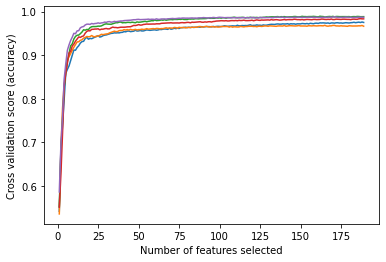

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFECV
etc = ExtraTreesClassifier(n_estimators= 2500, max_depth=400)
min_features_to_select = 1
rfecv = RFECV(
    estimator=etc,
    step=1,
    cv=StratifiedKFold(5),
    scoring='roc_auc',
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_smote, np.ravel(label_smote))

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [65]:
#Hyperparameter tuning for RFE-features
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
rf = ExtraTreesClassifier()
selector = RFE(rf, n_features_to_select=188, step=1)

selector = selector.fit(X_train_smote, np.ravel(label_smote))
X_train_RFE_smote_etc = selector.transform(X_train_smote)
X_test_RFE_smote_etc = selector.transform(X_test_scaled)

# 'n_estimators': [100,300] -> 300, [200,300] ->300, [250,300,350] ->350, [350,400,500,600]->500, [450,500,550] ->450
# 'max_depth' : [20,50] -> 50, [40,50,60] ->50, [45,50,55] ->50, [48,50,52] -> 50
# 'min_samples_split' : [2,5] ->2, [2,3] ->2, [1,2] ->2
# 'max_features' : [1,3,5] ->3 [2,3] ->3, [3,4] -> 4

parameters = {'n_estimators': [425,450,475], #was 3000
              'max_depth' : [50], #was none
              'min_samples_split' : [2],
              'max_features' : [4]} #was 2

search = GridSearchCV(estimator = ExtraTreesClassifier(), param_grid=parameters, scoring='roc_auc', cv = 5, verbose = 0, n_jobs = -1,refit=True)
search.fit(X_train_RFE_smote_etc, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 425, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [74]:
#ETC hyperparameter tuning for clustered eatures

pipeline = Pipeline(steps=[('model', ExtraTreesClassifier())])
parameters = {'n_estimators': [300,400,500], #was 3000
              'max_depth' : [40,50,60], #was none
              'min_samples_split': [2,4],
              'max_features' : [2,4]} #was 2

search = GridSearchCV(estimator = ExtraTreesClassifier(), param_grid=parameters, scoring='roc_auc', cv = 5, verbose = 0, n_jobs = -1,refit=True)
search.fit(X_sel, np.ravel(label_smote))
results = search.cv_results_
best_parameters = search.best_estimator_.get_params()
print(best_parameters)

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
#overfitting analysis
#Test set here is different than real test set.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

values = [i for i in range(1, 20)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = AdaBoostClassifier(learning_rate=i/10)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = roc_auc_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = roc_auc_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [76]:
#final predictions
test_rfc = CalibratedClassifierCV(base_estimator=ExtraTreesClassifier(n_estimators=500,max_depth=50,min_samples_split=2 ,max_features= 2),cv=3)
#test_rfc = ExtraTreesClassifier(n_estimators=425,max_depth=50,min_samples_split=2 ,max_features= 4)
test_rfc.fit(X_sel, np.ravel(label_smote))

test_pred = test_rfc.predict_proba(X_final_test_sel)



In [77]:
barcodes = X_test_base.index
barcodes = list(barcodes)
save_submission(barcodes, test_pred, './test27.csv')

In [ ]:
#Hyperparameters optimized on all training examples, and the hyperparameters yielding
#the highest mean auc across 3-fold cross-validation were selected.
# Then overfitting was estimated by training
#on a subset of the test data and validating thereafer, using the globally-fit hyperparameters.
#I attempted to mitigate overfitting by selecting max_iter values right after training performance peaked.
#Multiple preprocessing schemes were tested, and smote data augmentation was the most effective (as I compared across most models I tested).
#Feature importance was evaluated within RFE and by clustering.
#Archetectures were compared based on test set performance on kaggle.
#Due to the small size of the training set, I did not keep a validation set except for
#overfitting analyses.

In [ ]:
#The BNN and MLP were not as effective as the sklearn ensemble models.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
# !pip install blitz-bayesian-pytorch

from blitz.modules import BayesianLinear
from blitz.utils import variational_estimator

# class BayesianClassifier(nn.Module):
#     def __init__(self,):
#         super().__init__()
#         #self.linear = nn.Linear(input_dim, output_dim)
#         self.blinear1 = BayesianLinear(189, 512)
#         self.blinear2 = BayesianLinear(512, 1)
#         self.sigmoid = torch.nn.Sigmoid()
#     def forward(self, x):
#         x = x.type(torch.FloatTensor)
#         x_ = self.blinear1(x.to('cpu'))
#         out = self.blinear2(x_)
#         proba = self.sigmoid(out)
#         return proba

class LinearClassifier(nn.Module):
    def __init__(self,):
        super().__init__()
        #self.linear = nn.Linear(input_dim, output_dim)
        self.linear1 = torch.nn.Linear(189, 512)
        self.linear2 = torch.nn.Linear(512, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.ReLu = torch.nn.ReLU()
    def forward(self, x):
        x = torch.Tensor(x)
        x = x.type(torch.FloatTensor)
        x_ = self.linear1(x.to('cpu'))
        x_ = self.ReLu(x_)
        out = self.linear2(x_)
        proba = self.sigmoid(out)
        return proba

device = 'cpu'
model = LinearClassifier().to(device)
optimizer = torch.optim.Adam(list(model.parameters()), lr=1e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, factor=0.5)

def train(model, dataloader, optimizer, device):
    
    '''
    A function to train on the entire dataset for one epoch.
    
    Args: 
        model (torch.nn.Module): Your sequence classifier 
        dataloader (torch.utils.data.Dataloader): DataLoader object for the train data
        optimizer (torch.optim.Optimizer): Optimizer object to interface gradient calculation and optimization 
        device (str): Your device
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''

    batch_loss = []
    model.train() # Set model to training mode 
    
    for batch in dataloader:    
        features, label = batch
        features = features.to('cpu')
        label = label.to('cpu')
        # features = features.type(torch.LongTensor)
        # label = label.type(torch.LongTensor)
        
        # train your model on each batch here
        y_pred = model(features)

        loss = nn.functional.binary_cross_entropy(y_pred.squeeze(),label.squeeze())
        batch_loss.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return np.array(batch_loss).mean()


def validate(model, dataloader, device):
    
    '''
    A function to validate on the validation dataset for one epoch.
    
    Args: 
        model (torch.nn.Module): Your sequence classifier 
        dataloader (torch.utils.data.Dataloader): DataLoader object for the validation data
        device (str): Your device
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''
    
    val_loss = []
    model.eval() # Set model to evaluation mode 
    with torch.no_grad():    
        for batch in dataloader:
            features, label = batch

            features = features.to('cpu')
            label = label.to('cpu')
            # features = features.type(torch.LongTensor)
            # label = label.type(torch.LongTensor)

            
            # validate your model on each batch here 
            y_pred = model(features)
            loss = nn.functional.binary_cross_entropy(y_pred.squeeze(),label.squeeze())
            val_loss.append(loss.item())
            
    return np.array(val_loss).mean()   

def evaluate(model, dataloader, device):

    '''
    A function to return the classification probabilities and true labels (for evaluation). 
    
    Args: 
        model (torch.nn.Module): your sequence classifier 
        dataloader (torch.utils.data.Dataloader): DataLoader object for the train data
        device (str): Your device
        
    Returns: 
        (np.array, np.array): true labels, predicted probabilities
    '''

    pred_prob = []
    labels = []
    with torch.no_grad():
        model.eval()
        for batch in dataloader:
            epoch_loss = []
            features, label = batch

            features = features.to('cpu')
            label = label.to('cpu')
            
            # evaluate your model here
            model.eval()
            y_pred = model(features)
            pred_prob.append(y_pred)
            labels.append(label)
            
    return labels, pred_prob

print("epoch", "train loss", "validation loss")

val_loss_curve = []
train_loss_curve = []
#load in data
X_train_BN, X_val_BN, y_train_BN, y_val_BN = train_test_split(X_train_smote, label_smote, test_size=0.2)
train_data = ImmuneDataset(X_train_BN, y_train_BN)
batch_size = 256
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = ImmuneDataset(X_val_BN, y_val_BN)
batch_size = 256
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

for epoch in range(500):
    
    # Compute train your model on training data
    epoch_loss = train(model, train_loader, optimizer,  device=0)
    
    # Validate your on validation data 
    val_loss = validate(model, val_loader, device=0) 
    
    # Record train and loss performance 
    train_loss_curve.append(epoch_loss)
    val_loss_curve.append(val_loss)
    
    # The learning rate scheduler records the validation loss 
    scheduler.step(val_loss)
    
    print(epoch, epoch_loss, val_loss)
